In [28]:
import sys
import matplotlib.pyplot as plt
import cv2

sys.path.append('./../')

from utils.phase_1 import *
BLAZE_FACE_PATH = './../utils/libs/BlazeFace/'

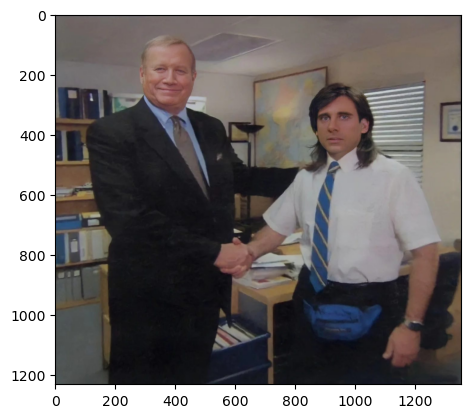

In [29]:
## Select taking a photo or using a sample image
# original_img = take_photo()
original_img = cv2.imread('../assets/the-office-handshake.jpg')

original_img = reverse_channels(original_img)
downsized_img = downsize_img(original_img, (128, 128))
plt.imshow(original_img)
plt.show()

In [30]:
device = get_torch_device()
device

PyTorch version: 2.1.0
CUDA version: None
cuDNN version: None


device(type='cpu')

In [31]:
model = load_blazeface(BLAZE_FACE_PATH, device)
configure_params(model, min_score_thresh=0.75, min_suppression_threshold=0.3)

In [32]:
detections = model.predict_on_image(downsized_img)
assert len(detections) != 0, 'No faces detected'
detections.shape

torch.Size([2, 17])

Found 2 faces


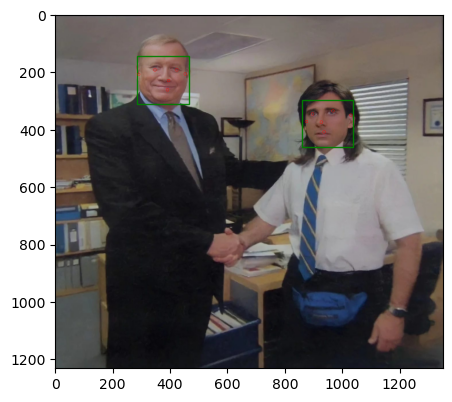

In [33]:
plot_detections(original_img, detections)

In [34]:
biggest_face_idx = get_idx_of_biggest_face(detections)
print(f"Biggest face id: {biggest_face_idx}")

Biggest face id: 0


144 285 310 467


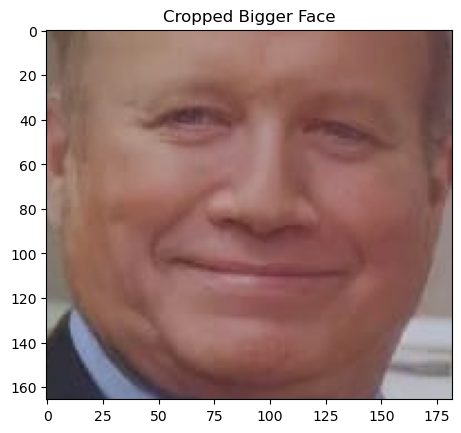

In [37]:
cropped_face = crop_face_from_img(original_img, detections[biggest_face_idx])
plt.imshow(cropped_face)
plt.title("Cropped Bigger Face")
plt.show()